In [1]:
## Data Preprocessing

#Import libraries and read data
import pandas as pd
credit = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/credit.csv')
# Display the top values of the credit data
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,A152,1,A172,2,A191,no
3,A11,42,A32,A42,7882,A61,A74,2,4,45,A143,A153,1,A173,2,A191,no
4,A11,24,A33,A40,4870,A61,A73,3,4,53,A143,A153,2,A173,2,A191,yes


In [2]:
# Display credit dataframe shape
credit.shape

(1000, 17)

In [12]:
# Perform label encoding for predictors
x = pd.get_dummies(credit.iloc[:,0:16], drop_first = True)

In [13]:
# Perform label encoding on target variable
from sklearn.preprocessing import LabelEncoder
labelencoder_credit = LabelEncoder()
y = labelencoder_credit.fit_transform(credit['default'].values)

In [14]:
# Split data into training set and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [15]:
## Build decision tree
# DecisionTreeClassifier is the module that builds a decision tree. Fit attribute used to train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print('Accuracy on test set: {:.3f}'.format(accuracy_score(y_pred,y_test)))

Accuracy on test set: 0.680


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


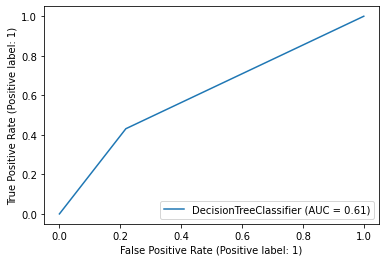

In [16]:
# Evaluate model performance on test set using ROC
from sklearn import metrics
from matplotlib import pyplot as plt
metrics.plot_roc_curve(tree,x_test,y_test)
plt.show()

In [17]:
## Cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree,x,y, cv = 5)
print('Accuracy scores of each fold: {}'.format(scores))
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Accuracy scores of each fold: [0.7   0.725 0.615 0.66  0.68 ]
Average cross-validation score: 0.68


In [18]:
## Ensemble methods -> Improve model performance

# Bagging method

from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators = 100, random_state = 0)
bagging.fit(x_train, y_train)
y_bagging_pred = bagging.predict(x_test)
print('Bagging Model Accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.770


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


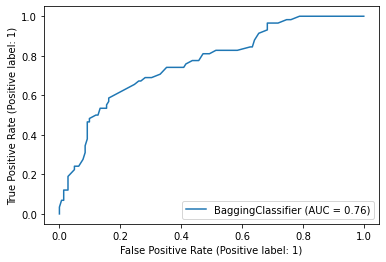

In [19]:
# Calculate AUC 

metrics.plot_roc_curve(bagging,x_test,y_test)
plt.show()

In [20]:
# Boosting Method

from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators=100, random_state = 0)
boost.fit(x_train,y_train)
y_boost_pred = boost.predict(x_test)
print('Accuracy on test set: {:.3f}'.format(accuracy_score(y_boost_pred, y_test)))

Accuracy on test set: 0.770


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


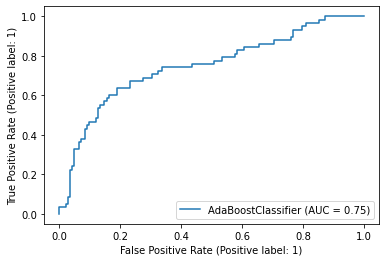

In [21]:
# Plot roc curve
metrics.plot_roc_curve(boost,x_test,y_test)
plt.show()

In [23]:
# Random Forest Method
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators = 1000, random_state = 0)
forest.fit(x_train,y_train)
y_rf_pred = forest.predict(x_test)
print('Random Forest Accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_rf_pred)))

Random Forest Accuracy on test set: 0.765


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


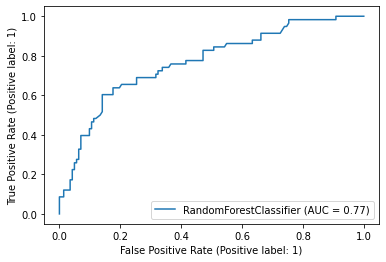

In [24]:
# Plot roc curve
metrics.plot_roc_curve(forest,x_test,y_test)
plt.show()

In [26]:
# calculate importance of each predictor for the target using random forest model
importances = forest.feature_importances_
df = pd.DataFrame({'feature':x_train.columns, 'Importance': importances})
df = df.sort_values('Importance')
print(df)

                    feature  Importance
21              purpose_A48    0.001737
15             purpose_A410    0.002645
18              purpose_A44    0.003130
19              purpose_A45    0.005668
25      savings_balance_A64    0.007269
31        other_credit_A142    0.009528
24      savings_balance_A63    0.009597
34             housing_A153    0.009988
20              purpose_A46    0.011386
23      savings_balance_A62    0.011644
22              purpose_A49    0.012295
12       credit_history_A33    0.012547
8      checking_balance_A13    0.012949
29  employment_duration_A74    0.014069
37                 job_A174    0.014574
14              purpose_A41    0.015595
35                 job_A172    0.015615
6                dependents    0.016054
30  employment_duration_A75    0.016573
16              purpose_A42    0.017283
11       credit_history_A32    0.017431
28  employment_duration_A73    0.018203
10       credit_history_A31    0.018878
36                 job_A173    0.018904


In [27]:
## Perform grid search to tune hyperparams

# Define a combo of parameters and apply them to the decision model

import numpy as np
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini','entropy'],'max_leaf_nodes': list(range(2,50)), 'max_depth':np.arange(3,15)}
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 0), params, cv=10)
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [29]:
# Value of max_depth that is best for the model?

tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=17, random_state=0)

In [31]:
# Apply model on test set and get accuracy

y_pred_grid = tree_grid.predict(x_test)
print('Grid-search Model Accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_pred_grid)))

Grid-search Model Accuracy on test set: 0.740


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


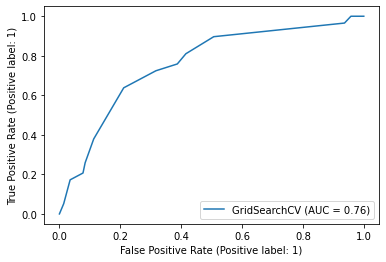

In [32]:
# Visualize ROC curve and eastimate AUC Value
# Plot roc curve
metrics.plot_roc_curve(tree_grid,x_test,y_test)
plt.show()